In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [74]:
path_to_application = '/home/student/Machine Learning/application_record.csv'
applicant_data = pd.read_csv(path_to_application)

display(applicant_data.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Dataset Documentation

### CODE_GENDER

Description: The gender of the applicant, represented as 'M' for male and 'F' for female.<br>
Importance: Understanding gender distribution can help analyze potential biases or trends in loan approvals.

### FLAG_OWN_CAR
Description: Indicates whether the applicant owns a car (Y for yes, N for no).<br>
Importance: Car ownership may be correlated with financial stability, impacting the likelihood of loan approval.

### FLAG_OWN_REALTY
Description: Indicates whether the applicant owns real estate (Y for yes, N for no).<br>
Importance: Homeownership can be a sign of financial security and can influence creditworthiness assessments.

### CNT_CHILDREN
Description: The number of children the applicant has.<br>
Importance: Family size may affect financial obligations and the applicant's ability to repay loans.

### AMT_INCOME_TOTAL
Description: The total annual income of the applicant.<br>
Importance: This is a critical factor in determining loan eligibility and the amount that can be approved.

### NAME_INCOME_TYPE
Description: The type of income source, e.g., Working, Commercial associate, Pensioner.<br>
Importance: Different income types can indicate varying levels of financial stability and risk.

### NAME_EDUCATION_TYPE
Description: The highest level of education attained by the applicant (e.g., Higher education, Secondary).<br>
Importance: Education level can correlate with earning potential and job stability, affecting loan approval chances.

### NAME_FAMILY_STATUS
Description: The applicant’s family situation (e.g., Single, Married, Civil marriage).<br>
Importance: Family status can influence financial responsibilities and stability.

### NAME_HOUSING_TYPE
Description: The type of housing where the applicant lives (e.g., House/apartment, Rented apartment).<br>
Importance: Housing stability may impact the applicant’s ability to repay a loan.

### DAYS_BIRTH
Description: The applicant's age in days (negative values indicate the age in the past).<br>
Importance: Age can be a factor in assessing risk, with certain age groups potentially being more reliable borrowers.

### DAYS_EMPLOYED
Description: The number of days the applicant has been employed (negative values indicate time since employment started).<br>
Importance: Employment duration is an indicator of job stability and income reliability, crucial for assessing loan risk.

### FLAG_MOBIL
Description: Indicates whether the applicant has a mobile phone (1 for yes, 0 for no).<br>
Importance: Having a mobile phone can facilitate communication and may correlate with financial stability.

### FLAG_WORK_PHONE
Description: Indicates whether the applicant has a work phone (1 for yes, 0 for no).<br>
Importance: Similar to mobile phone ownership, a work phone can suggest job stability.

### FLAG_PHONE
Description: Indicates whether the applicant has a home phone (1 for yes, 0 for no).<br>
Importance: Access to a phone may indicate stability and the ability to communicate effectively.

### FLAG_EMAIL
Description: Indicates whether the applicant has an email address (1 for yes, 0 for no).<br>
Importance: Having an email address can reflect modern communication norms and accessibility.

### OCCUPATION_TYPE
Description: The applicant’s occupation (e.g., Security staff, Sales staff).<br>
Importance: Occupation type can provide insight into income stability and potential risks associated with loan approval.

### CNT_FAM_MEMBERS
Description: The number of family members living with the applicant.<br>
Importance: The size of the household may affect financial obligations and stability, influencing loan approval outcomes.

1. **ID**
   - **Description**: A unique identifier for each individual or account in the dataset.
   - **Data Type**: Integer
   - **Example Values**: 5001711

2. **MONTHS_BALANCE**
   - **Description**: The number of months before the current month, where `0` represents the current month. Negative values indicate previous months.
   - **Data Type**: Integer
   - **Example Values**: 0, -1, -2

3. **STATUS**
   - **Description**: The payment status for the given month. Possible values include:
     - `X`: No DPD (Days Past Due)
     - `0`: Paid on time
   - **Data Type**: Categorical (string)
   - **Example Values**: X, 0


In [75]:
path_to_application = '/home/student/Machine Learning/credit_record.csv'
credit_data = pd.read_csv(path_to_application)

# display(credit_data.head())

### ID<br>
Description: A unique identifier for each loan account.<br>
Importance: This column allows for the tracking of individual loan records, facilitating analysis over time for each account.

### MONTHS_BALANCE
Description: The time frame in months relative to the current date. A value of 0 indicates the most recent month, while negative values indicate past months (e.g., -1 for one month ago, -2 for two months ago).<br>
Importance: This column is crucial for understanding the historical payment status of each loan account over time, enabling analysis of trends in repayment behavior.

### STATUS
Description: Indicates the payment status of the loan for the corresponding month balance. The possible values are:<br>
0: 1-29 days past due<br>
1: 30-59 days past due<br>
2: 60-89 days overdue<br>
3: 90-119 days overdue<br>
4: 120-149 days overdue<br>
5: Overdue or bad debts, write-offs for more than 150 days<br>
C: Paid off that month<br>
X: No loan for the month<br>
Importance: The status is critical for assessing the repayment behavior and creditworthiness of borrowers. Analyzing this data helps identify patterns in payment delays and defaults, which are vital for risk assessment and loan management.

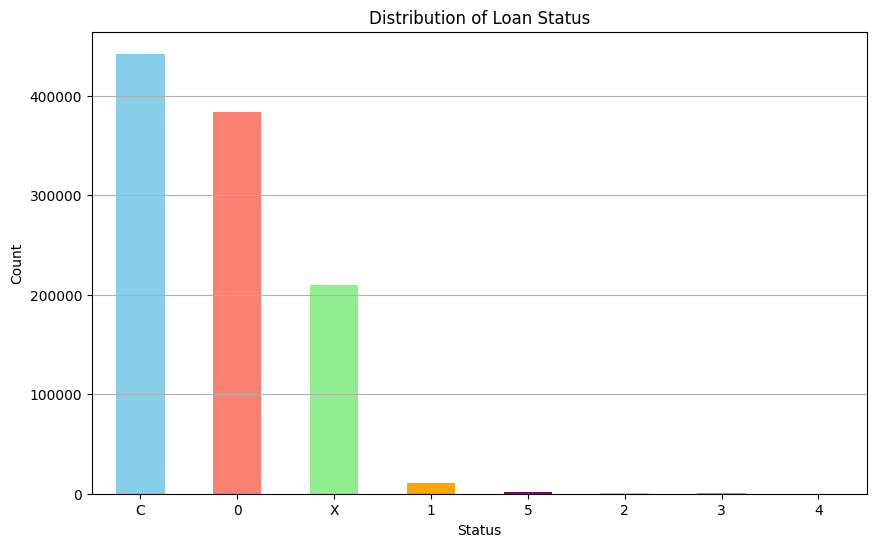

In [76]:
# Count the occurrences of each status
status_counts = credit_data['STATUS'].value_counts()

# Define colors for each status
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gold', 'lightcoral', 'lightpink']

# Create a bar graph
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=colors[:len(status_counts)])
plt.title('Distribution of Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [77]:
merged_df = pd.merge(applicant_data, credit_data, on='ID', how='inner')

# print(merged_df)

In [78]:
# Filter out rows where STATUS is 'X'
merged_df_filtered = merged_df[merged_df['STATUS'] != 'X'].copy()

# Create loan labels based on STATUS
merged_df_filtered.loc[:, 'label'] = merged_df_filtered['STATUS'].apply(
    lambda status: 0 if status in ['0', '1', '2', '3', '4', '5'] 
                   else 1 if status == 'C'
                   else 2
)

# Keep all columns from both DataFrames
result_df = merged_df_filtered

# print(result_df)

In [79]:
result_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C,1


In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_values = result_df.isnull().sum()
# print(missing_values)

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

OCCUPATION_TYPE    196265
dtype: int64


In [81]:
# Calculate the mode of the OCCUPATION_TYPE column
occupation_mode = result_df['OCCUPATION_TYPE'].mode()[0]  # Get the first mode

# Fill missing values with the mode and assign back to the column
result_df['OCCUPATION_TYPE'] = result_df['OCCUPATION_TYPE'].fillna(occupation_mode)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
result_df.head()


Updated DataFrame:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,C,1


In [82]:
# Convert age from days to years, ensuring no negative values
result_df['DAYS_BIRTH'] = result_df['DAYS_BIRTH'].abs() / 365

# Display the updated DataFrame
result_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Laborers,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Laborers,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Laborers,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Laborers,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Laborers,2.0,-4,C,1


In [83]:
# Convert age from days to years, ensuring no negative values
result_df['DAYS_EMPLOYED'] = result_df['DAYS_EMPLOYED'].abs() / 365

# Display the updated DataFrame
result_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-4,C,1


In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_values = result_df.isnull().sum()
# print(missing_values)

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


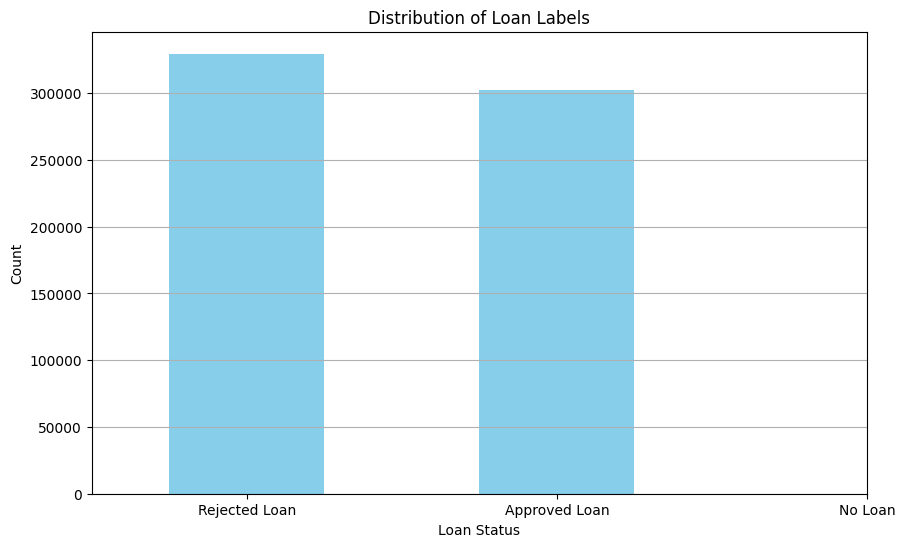

In [85]:
label_counts = result_df['label'].value_counts()

label_names = ['Rejected Loan', 'Approved Loan', 'No Loan']

# Create a bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Labels')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=0)
plt.grid(axis='y')
plt.show()

In [86]:
new_column_names_applicant = {
    'ID': 'id',
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'owns_car',
    'FLAG_OWN_REALTY': 'owns_property',
    'CNT_CHILDREN': 'num_children',
    'AMT_INCOME_TOTAL': 'total_income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education_type',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'DAYS_BIRTH': 'age_in_days',
    'DAYS_EMPLOYED': 'days_employed',
    'FLAG_MOBIL': 'owns_mobile_phone',
    'FLAG_WORK_PHONE': 'owns_work_phone',
    'FLAG_PHONE': 'owns_mobile_phone',
    'FLAG_EMAIL': 'owns_mobile_phone',
    'OCCUPATION_TYPE': 'occupation_type',
    'CNT_FAM_MEMBERS': 'number_of_family_members'
}


### Apply renaming to the dataframe
result_df.rename(columns=new_column_names_applicant, inplace=True)

In [87]:
result_df.head()

,id,gender,owns_car,owns_property,num_children,total_income,income_type,education_type,family_status,housing_type,age_in_days,days_employed,owns_mobile_phone,owns_work_phone,owns_mobile_phone,owns_mobile_phone,occupation_type,number_of_family_members,MONTHS_BALANCE,STATUS,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Laborers,2.0,-4,C,1


In [88]:
# Filter the DataFrame for rows where occupation_type is 'laborers'
laborers_df = result_df[result_df['occupation_type'] == 'Laborers']

# Print the filtered DataFrame to confirm
# print(laborers_df.head())

In [89]:
# Drop the 'income_type' column
result_df = result_df.drop(columns=['income_type'])

# Print the updated DataFrame
# print(result_df.head())

In [90]:
# List all categorical columns
categorical_columns = result_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['gender', 'owns_car', 'owns_property', 'education_type', 'family_status', 'housing_type', 'occupation_type', 'STATUS']


In [91]:
new_column_names_credit = {
    'MONTHS_BALANCE': 'month_balance',
    'STATUS': 'status'
}
result_df.rename(columns=new_column_names_credit, inplace=True)

In [92]:
categorical_ordinal_columns = ['education_type']
categorical_binary_columns = ['owns_car', 'owns_property']
categorical_label_encode_columns = ['family_status', 'housing_type', 'occupation_type', 'status']
numerical_columns = ['age_in_days', 'days_employed', 'days_employed', 'num_children']

In [93]:
# Convert age in days to age in years, ensuring no negative values
result_df['age_in_years'] = (result_df['age_in_days'].abs() / 365).round().astype(int)

# Display the updated DataFrame
# print(result_df)

In [94]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# 1. Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
result_df[categorical_ordinal_columns] = ordinal_encoder.fit_transform(result_df[categorical_ordinal_columns])

# print(result_df)

In [95]:
# Binary encoding for only the 'gender' column
result_df['gender'] = result_df['gender'].map({'M': 1, 'F': 0})

# print(result_df)

In [96]:
# 3. Apply Label Encoding for remaining categorical columns
label_encoder = LabelEncoder()
for col in categorical_label_encode_columns:
    result_df[col] = label_encoder.fit_transform(result_df[col])

# print(result_df)

In [97]:
# 2. Apply Binary Encoding manually for binary columns
for col in categorical_binary_columns:
    result_df[col] = result_df[col].map({'Y': 1, 'N': 0})

In [98]:

# print(result_df)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_values = result_df.isnull().sum()
# print(missing_values)

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [99]:
# Calculate the mode of the OCCUPATION_TYPE column
occupation_mode = result_df['gender'].mode()[0]

# Fill missing values with the mode and assign back to the column
result_df['gender'] = result_df['gender'].fillna(occupation_mode)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(result_df)


Updated DataFrame:


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [100]:
result_df.to_csv('result_data.csv', index=False)

In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features you want to use
features = ['gender', 'owns_car', 'owns_property', 'num_children', 
            'total_income', 'education_type', 'family_status',
            'housing_type', 'age_in_days', 'days_employed', 
            'occupation_type', 'number_of_family_members']

# Assuming 'result_df' contains your features and the target variable
X = result_df[features]  # Use only the specified columns
y = result_df['label']    # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 56.10%
Confusion Matrix:
[[32281 28323]
 [27140 38609]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54     60604
           1       0.58      0.59      0.58     65749

    accuracy                           0.56    126353
   macro avg       0.56      0.56      0.56    126353
weighted avg       0.56      0.56      0.56    126353



In [69]:
import pickle

with open('trained_gradient_boosting.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

print("Model saved as 'trained_gradient_boosting.pkl'")

Model saved as 'trained_gradient_boosting.pkl'


In [102]:
# Load the preprocessor
with open('trained_gradient_boosting_vectorizer.pkl', 'rb') as preprocessor_file:
    loaded_preprocessor = pickle.load(preprocessor_file)

# Prepare your new data (ensure it has the same structure as the training data)
# new_data = pd.DataFrame(...)

# Transform new data using the loaded preprocessor (which includes the vectorizer)
new_data_processed = loaded_preprocessor.transform(new_data)

# Predict using the loaded model
predictions = loaded_model.predict(new_data_processed)

FileNotFoundError: [Errno 2] No such file or directory: 'trained_gradient_boosting_vectorizer.pkl'

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Define the features you want to use
# features = ['gender', 'owns_car', 'owns_property', 'num_children', 
#             'total_income', 'education_type', 'family_status', 
#             'housing_type', 'age_in_days', 'days_employed', 
#             'occupation_type', 'number_of_family_members']

# # Assuming 'result_df' contains your features and the target variable
# X = result_df[features]
# y = result_df['label']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# # Hyperparameter tuning with GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            scoring='accuracy',
#                            cv=3,
#                            n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train_sm, y_train_sm)

# # Best parameters and estimator
# best_rf_classifier = grid_search.best_estimator_

# # Predict on the test set
# y_pred = best_rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy * 100:.2f}%")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features you want to use
features = ['gender', 'owns_car', 'owns_property', 'num_children', 
            'total_income', 'education_type', 'family_status', 
            'housing_type', 'age_in_days', 'days_employed', 
            'occupation_type', 'number_of_family_members']

# Assuming 'result_df' contains your features and the target variable
X = result_df[features]  # Use only the specified columnsIntroduction to Object Serialization

y = result_df['label']    # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 51.19%
Confusion Matrix:
[[29819 30785]
 [30882 34867]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49     60604
           1       0.53      0.53      0.53     65749

    accuracy                           0.51    126353
   macro avg       0.51      0.51      0.51    126353
weighted avg       0.51      0.51      0.51    126353



In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features you want to use
features = ['gender', 'owns_car', 'owns_property', 'num_children', 
            'total_income', 'education_type', 'family_status', 
            'housing_type', 'age_in_days', 'days_employed', 
            'occupation_type', 'number_of_family_members']

# Assuming 'result_df' contains your features and the target variable
X = result_df[features]  # Use only the specified columns
y = result_df['label']    # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 56.10%
Confusion Matrix:
[[32281 28323]
 [27140 38609]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54     60604
           1       0.58      0.59      0.58     65749

    accuracy                           0.56    126353
   macro avg       0.56      0.56      0.56    126353
weighted avg       0.56      0.56      0.56    126353



In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features you want to use
features = ['gender', 'owns_car', 'owns_property', 'num_children', 
            'total_income', 'education_type', 'family_status', 
            'housing_type', 'age_in_days', 'days_employed', 
            'occupation_type', 'number_of_family_members']

# Assuming 'result_df' contains your features and the target variable
X = result_df[features]  # Use only the specified columns
y = result_df['label']    # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the CatBoost model
catboost_classifier = CatBoostClassifier(iterations=1000, 
                                          learning_rate=0.1, 
                                          depth=6, 
                                          random_state=42,
                                          verbose=0)  # Set verbose=0 to suppress output
catboost_classifier.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Create a ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

NameError: name 'numerical_transformer' is not defined

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 6. Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# 7. Predict on the test set
y_pred = rf_model.predict(X_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 9. Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


NameError: name 'X_train_sm' is not defined

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize the confusion matrix with a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Predicted Negative', 'Predicted Positive'], 
#             yticklabels=['Actual Negative', 'Actual Positive'])
# plt.title('Confusion Matrix Heatmap')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # 2. Set up the matplotlib figure
# plt.figure(figsize=(8, 6))

# # 3. Create a heatmap
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Class 0', 'Class 1'], 
#             yticklabels=['Class 0', 'Class 1'])

# # 4. Add labels and title
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix Heatmap')

# # 5. Show the plot
# plt.show()

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 4. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 6. Train the Linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_sm, y_train_sm)

# 7. Predict on the test set
y_pred = svm_model.predict(X_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


NameError: name 'X' is not defined